<a href="https://colab.research.google.com/github/dakshnpci/NPCIMLTraining/blob/master/CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
# fix dimension ordering issue
from keras import backend as K
K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
%matplotlib inline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5,1,'Class 2')

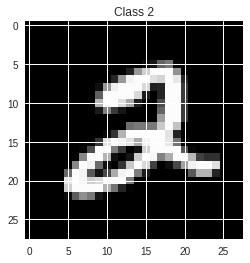

In [2]:

plt.imshow(X_train[5], cmap='gray')
plt.title('Class '+ str(y_train[5]))


In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
#   model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	return model
# build the model
model = baseline_model()
# Fit the model
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.7941 - acc: 0.7843 - val_loss: 0.3274 - val_acc: 0.9035
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3377 - acc: 0.8982 - val_loss: 0.2742 - val_acc: 0.9201
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2830 - acc: 0.9155 - val_loss: 0.2251 - val_acc: 0.9350
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2450 - acc: 0.9278 - val_loss: 0.1978 - val_acc: 0.9417
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2143 - acc: 0.9361 - val_loss: 0.1677 - val_acc: 0.9504
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1888 - acc: 0.9440 - val_loss: 0.1525 - val_acc: 0.9566
Epoch 7/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1686 - acc: 0.9506 - val_loss: 0.1337 - val_acc

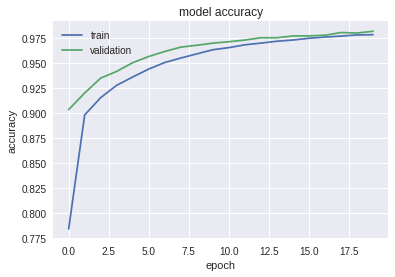

In [15]:
# val_acc = np.mean(model.history['val_acc'])
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.1779 - acc: 0.9461 - val_loss: 0.0489 - val_acc: 0.9845
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.0420 - val_acc: 0.9876
Epoch 3/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.0357 - acc: 0.9885 - val_loss: 0.0305 - val_acc: 0.9903
Epoch 4/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0317 - val_acc: 0.9897
Epoch 5/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0228 - acc: 0.9927 - val_loss: 0.0362 - val_acc: 0.9898
Epoch 6/20
60000/60000 [==============================] - 8s 131us/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.0353 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0356 - 

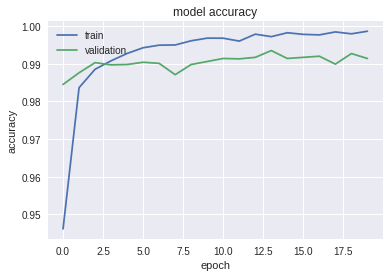

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
	# create model
  model = Sequential()
  model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
  model.add(Conv2D(32, (3, 3), input_shape=(1, 28, 28), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# build the model
model = baseline_model()
# Fit the model
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# val_acc = np.mean(model.history['val_acc'])
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.2844 - acc: 0.9128 - val_loss: 0.0771 - val_acc: 0.9754
Epoch 2/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0804 - acc: 0.9749 - val_loss: 0.0420 - val_acc: 0.9865
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0604 - acc: 0.9814 - val_loss: 0.0352 - val_acc: 0.9876
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0497 - acc: 0.9844 - val_loss: 0.0332 - val_acc: 0.9888
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0310 - val_acc: 0.9894
Epoch 6/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0363 - acc: 0.9882 - val_loss: 0.0284 - val_acc: 0.9909
Epoch 7/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0326 - acc: 0.9895 - val_loss: 0.0247 - 

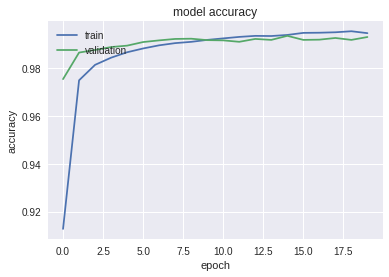

In [25]:
# Larger CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = larger_model()
# Fit the model
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))


# val_acc = np.mean(model.history['val_acc'])
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
